In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [15]:
N = 10
std = 0.5
torch.manual_seed(1)
x = torch.cat((std*torch.randn(2,N)+torch.Tensor([[2],[-2]]), std*torch.randn(2,N)+torch.Tensor([[-2],[2]])),1)
print(x)

tensor([[ 1.2372,  1.6249,  1.6730,  1.1953,  2.4328,  2.1222,  1.6685,  2.4037,
          2.2196,  2.5856, -1.9005, -1.9771, -1.9235, -2.2378, -1.8924, -2.2621,
         -2.9017, -2.6542, -1.7734, -1.4289],
        [-1.1163, -2.0477, -1.9694, -2.3089, -2.3990, -2.0658, -2.3992, -1.8321,
         -1.8623, -1.1418,  2.1243,  1.1123,  2.5587,  2.1491,  2.0549,  1.6768,
          2.2143,  2.7380,  1.1066,  2.8052]])


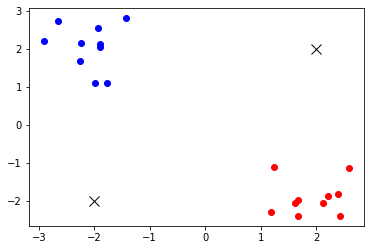

In [16]:
def Plot(c):
    plt.plot(x[0,:N].numpy(), x[1,:N].numpy(), 'ro')
    plt.plot(x[0,N:].numpy(), x[1,N:].numpy(), 'bo')
    l = plt.plot(c[0,:].numpy(), c[1,:].numpy(), 'kx')
    plt.setp(l, markersize=10)
    plt.show()

c = torch.Tensor([[2, -2],[2, -2]])
ctmp = c.transpose(0,1).view(2,2,1)

Plot(c)

In [20]:
print(x)
print(ctmp)
print(x-ctmp)
torch.sum((x - ctmp)**2,axis = 1)

tensor([[ 1.2372,  1.6249,  1.6730,  1.1953,  2.4328,  2.1222,  1.6685,  2.4037,
          2.2196,  2.5856, -1.9005, -1.9771, -1.9235, -2.2378, -1.8924, -2.2621,
         -2.9017, -2.6542, -1.7734, -1.4289],
        [-1.1163, -2.0477, -1.9694, -2.3089, -2.3990, -2.0658, -2.3992, -1.8321,
         -1.8623, -1.1418,  2.1243,  1.1123,  2.5587,  2.1491,  2.0549,  1.6768,
          2.2143,  2.7380,  1.1066,  2.8052]])
tensor([[[ 2.],
         [ 2.]],

        [[-2.],
         [-2.]]])
tensor([[[-0.7628, -0.3751, -0.3270, -0.8047,  0.4328,  0.1222, -0.3315,
           0.4037,  0.2196,  0.5856, -3.9005, -3.9771, -3.9235, -4.2378,
          -3.8924, -4.2621, -4.9017, -4.6542, -3.7734, -3.4289],
         [-3.1163, -4.0477, -3.9694, -4.3089, -4.3990, -4.0658, -4.3992,
          -3.8321, -3.8623, -3.1418,  0.1243, -0.8877,  0.5587,  0.1491,
           0.0549, -0.3232,  0.2143,  0.7380, -0.8934,  0.8052]],

        [[ 3.2372,  3.6249,  3.6730,  3.1953,  4.4328,  4.1222,  3.6685,
           4.4037,

tensor([[10.2931, 16.5244, 15.8632, 19.2140, 19.5389, 16.5458, 19.4630, 14.8482,
         14.9658, 10.2141, 15.2291, 16.6057, 15.7061, 17.9815, 15.1539, 18.2699,
         24.0724, 22.2059, 15.0366, 12.4058],
        [11.2604, 13.1421, 13.4919, 10.3051, 19.8094, 16.9969, 13.6176, 19.4203,
         17.8237, 21.7642, 17.0198,  9.6869, 20.7874, 17.2713, 16.4541, 13.5878,
         18.5731, 22.8769,  9.7021, 23.4157]])

Cost: 143.242310


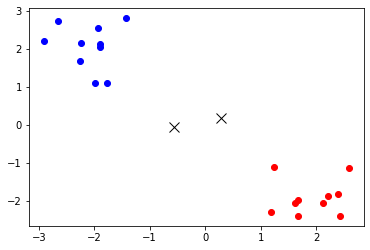

Cost: 73.516045


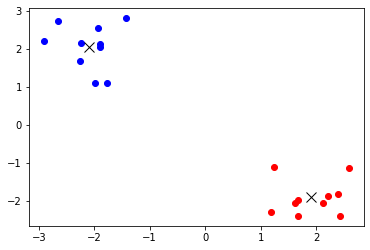

Cost: 4.559995


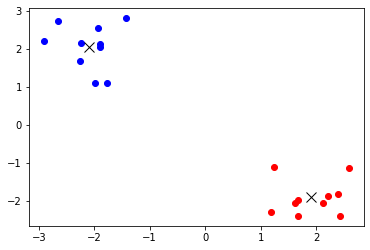

Cost: 4.559995


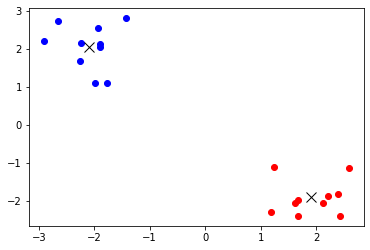

Cost: 4.559995


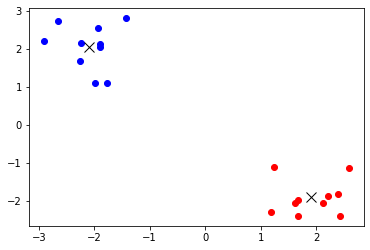

Cost: 4.559995


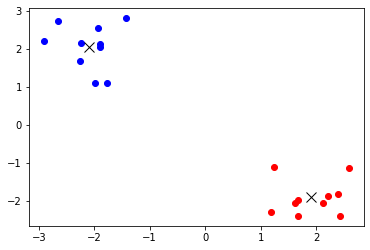

Cost: 4.559995


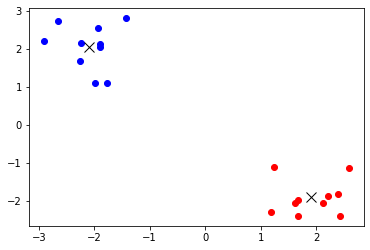

Cost: 4.559995


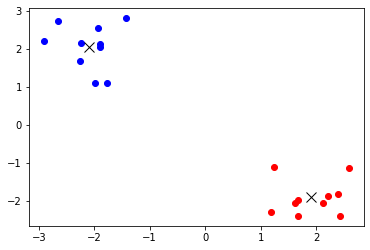

Cost: 4.559995


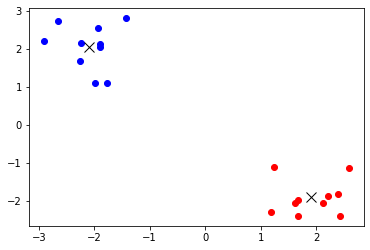

Cost: 4.559995


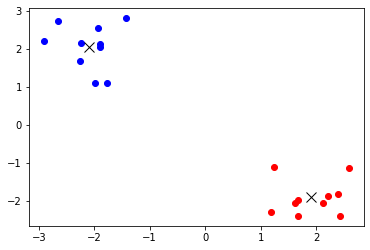

tensor([[[ 1.9163],
         [-1.9143]],

        [[-2.0952],
         [ 2.0540]]])


In [21]:
for iter in range(10):
    ##############################
    ## compute the distance between points and cluster centers
    ## Dimensions: dist (2x20)
    ##############################
    dist = 0.5*torch.sum((x - ctmp)**2,axis = 1)

    val, assign = dist.min(0)
    print("Cost: %f" % torch.sum(val))
    for k in range(ctmp.size()[0]):
        mn = torch.mean(x[:,assign==k],1)
        ctmp[k,:,:] = mn.view(-1,1)
    
    Plot(c)

print(ctmp)

In [8]:
dist

tensor([[5.4896e-01, 5.1355e-02, 3.1111e-02, 3.3779e-01, 2.5092e-01, 3.2686e-02,
         1.4828e-01, 1.2214e-01, 4.7342e-02, 5.2231e-01, 1.5439e+01, 1.2159e+01,
         1.7376e+01, 1.6884e+01, 1.5130e+01, 1.5177e+01, 2.0129e+01, 2.1266e+01,
         1.1369e+01, 1.6732e+01],
        [1.0578e+01, 1.5331e+01, 1.5194e+01, 1.4931e+01, 2.0166e+01, 1.7380e+01,
         1.6998e+01, 1.7671e+01, 1.6977e+01, 1.6062e+01, 2.1422e-02, 4.5038e-01,
         1.4207e-01, 1.4696e-02, 2.0555e-02, 8.5068e-02, 3.3808e-01, 3.9018e-01,
         5.0060e-01, 5.0405e-01]])